# Hinweis zu den Aufgaben

Die mit F bezeichneten Aufgaben sind fortgeschrittene Aufgaben. Die Bearbeitung ist freiwillig.

Tensorflow wirft beim Ausführen im JupyterLab eventuell Fehler zu CPU und GPU settings. Wenn der Code trotzdem durchläuft, dürfen diese in der folgenden Übung ignoriert werden.

## Folgende Dateien werden benötigt
und müssen unter den aufgeführten URLs heruntergeladen und in das Verzeichnis input-data gelegt werden:
- ecg_tracings.hdf5 (https://doi.org/10.5281/zenodo.3625006)
- model.hdf5 (https://doi.org/10.5281/zenodo.3625017)

In [1]:
# Import required libs
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np # numerical arrays
import h5py
import tensorflow as tf
from tensorflow import keras

# get versions
print(
    'Versions: mpl: ' + mpl.__version__ + 
    ', np: ' + np.__version__ + 
    ', tf: ' + tf.__version__)

2022-01-25 13:32:46.892877: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-25 13:32:46.892936: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Versions: mpl: 3.4.3, np: 1.20.3, tf: 2.7.0


# Deep Learning auf Biosignalen

Deep Learning erkennt selbstständig Muster in Daten und ermöglicht bspw. Klassifikationen. Wir sehen uns hier ein vortrainiertes Beispiel für supervised learning an: ein Modell, das mit Daten trainiert wurde, denen Labels mitgeliefert wurden.

## Tensorflow

Das Modell von Ribeiro et al. wurde mit TensorFlow erstellt, einer Plattform für Machine Learning Anwendungen. Keras ist die Python-API, mit der wir auf diese Plattform zugreifen.

TensorFlow nutzt, wie der Name bereits sagt, einen speziellen Datentyp: den Tensor. Tensoren sind mehrdimensionale Arrays mit einem einheitlichen Typ. Für eine detaillierte Anleitung ist https://www.tensorflow.org/guide/tensor zu empfehlen.

In [2]:
# Ein Tensor kann mit tf.constant() erstellt werden. Die Dimension ergibt sich aus den ähnlich zu einem np.array angegebenen Daten. Der Typ ist per default int32, kann aber explizit angegeben werden.

rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


2022-01-25 13:32:52.452101: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-25 13:32:52.452155: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-25 13:32:52.452193: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (d4f7d9a811aa): /proc/driver/nvidia/version does not exist
2022-01-25 13:32:52.452576: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Hier ein Beispiel für einen mehrdimensionalen Tensor des Typs float16 (dtype). Die Dimensionen sind im shape erkennbar.

rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],], dtype=tf.float16)

print(rank_3_tensor)

tf.Tensor(
[[[ 0.  1.  2.  3.  4.]
  [ 5.  6.  7.  8.  9.]]

 [[10. 11. 12. 13. 14.]
  [15. 16. 17. 18. 19.]]

 [[20. 21. 22. 23. 24.]
  [25. 26. 27. 28. 29.]]], shape=(3, 2, 5), dtype=float16)


## Vorbereitung

Wir laden nun zuerst das fertig trainierte Deep Learning Modell, anschließend den dazugehörigen Testdatensatz, und führen das Modell auf diesen Daten aus.

In [4]:
# relative path to file
data_dir = '../input-data'

# filename 
file_name = 'model.hdf5'

# load and compile DL model
model = keras.models.load_model(os.path.join(data_dir,file_name), compile=False)
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam())

In [5]:
# filename 
file_name = 'ecg_tracings.hdf5'

# load test data
with h5py.File(os.path.join(data_dir,file_name), "r") as f:
    x = np.array(f['tracings'])

In [6]:
# execute DL model on test data - from zenodo manual
label = model(x)

**Q1:** Welche Dimensionen hat der Output des Modells?

In [ ]:
print(pass)

In [7]:
### musterloesung

print(label.shape)

(827, 6)


## Interpretation der Ergebnisse

**Q2:** Wie wahrscheinlich ist es, dass das 16te EKG im Datensatz ein Vorhofflimmern zeigt? \
Tipp: Der Output ist in der Dokumentation des Modells auf Zenodo beschrieben.

In [ ]:
pAF = pass
print("Die Wahrscheinlichkeit für Vorhofflimmern im 16ten EKG beträgt rund " + f'{pAF:.2f}' + "%")

In [8]:
### musterloesung

pAF = label[15][4].numpy() * 100
print("Die Wahrscheinlichkeit für Vorhofflimmern im 16ten EKG beträgt rund " + f'{pAF:.2f}' + "%")

Die Wahrscheinlichkeit für Vorhofflimmern im 16ten EKG beträgt rund 16.97%


**Q3:** Sehen Sie sich alle Ergebnisse dieses EKGs in einem Barplot an. Welche Abnormalität ist am wahrscheinlichsten?

In [ ]:
abnorms = np.array(["1dAVb","RBBB","LBBB","SB","AF","ST"])
fig = plt.figure(figsize = (20, 10))

i = pass

plt.bar(pass, pass, color ='maroon', 
        width = 0.4)
plt.xlabel("ECG abnormalities")
plt.ylabel("Probabilities in %")
plt.title("Results for Patient " + str(i+1))
plt.show()

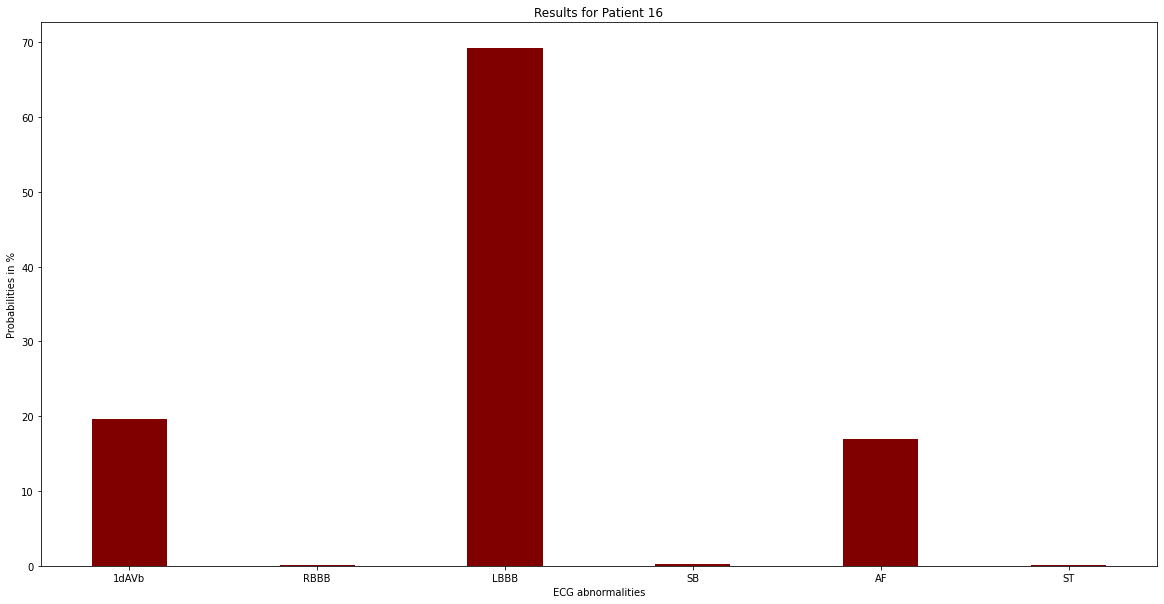

In [9]:
### musterloesung

abnorms = np.array(["1dAVb","RBBB","LBBB","SB","AF","ST"])
fig = plt.figure(figsize = (20, 10))

i = 15

plt.bar(abnorms, label[i].numpy()*100, color ='maroon', 
        width = 0.4)
plt.xlabel("ECG abnormalities")
plt.ylabel("Probabilities in %")
plt.title("Results for Patient " + str(i+1))
plt.show()

**A2:** pass

### musterloesung

**A2:** Ein Linksschenkelblock (Left Bundle Branch Block, LBBB) ist mit knapp 70% am wahrscheinlichsten.

Für das Modell wurde anhand eines "Goldstandards" aus visuellen Bewertungen von Professionellen für jede Abnormalität ein Schwellenwert bestimmt, ab welchem die Abnormalität als klassifiziert gilt. Die Schwellenwerte sind folgende:

[0.124, 0.07, 0.05, 0.278, 0.390, 0.174] (s. https://github.com/antonior92/automatic-ecg-diagnosis/blob/master/generate_figures_and_tables.py)

**Q4:** Speichern Sie die Indizes der als AF und LBBB klassifizierten EKGs in eigenen Arrays. Wie viele EKGs haben jeweils den Schwellenwert überschritten?

In [ ]:
# get cohorts
af_pid = []
lbbb_pid = []

for i in range(len(x)):
    pass
        
print("Der Schwellenwert wurde für AF " + pass + " mal und für LBBB " + pass + " mal überschritten.")

In [10]:
### musterloesung

# get cohorts
af_pid = []
lbbb_pid = []

for i in range(len(x)):
    if label[i][2].numpy() > 0.05:
        lbbb_pid.append(i)
    elif label[i][4].numpy() > 0.17:
        af_pid.append(i)
        
print("Der Schwellenwert wurde für AF " + str(len(af_pid)) + " mal und für LBBB " + str(len(lbbb_pid)) + " mal überschritten.")

Der Schwellenwert wurde für AF 14 mal und für LBBB 31 mal überschritten.


**Q5:** Vergleichen Sie nun die beiden Kohorten in einem Boxplot miteinander. Was fällt für die jeweiligen Verteilungen auf?

In [ ]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    plt.setp(bp['fliers'], markeredgecolor=color)
    
plt.figure(figsize = (16, 8))

ticks = abnorms
bpl = plt.boxplot(pass, positions=np.array(range(len(ticks)))*2.0-0.4, widths=0.6)
bpr = plt.boxplot(pass, positions=np.array(range(len(ticks)))*2.0+0.4, widths=0.6)
set_box_color(bpl, '#D7191C')
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='AF')
plt.plot([], c='#2C7BB6', label='LBBB')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(-0.1, 1)
plt.xlabel("DNN-class (ECG Abnormality)")
plt.ylabel("Class probability")
plt.grid(True)
plt.tight_layout()

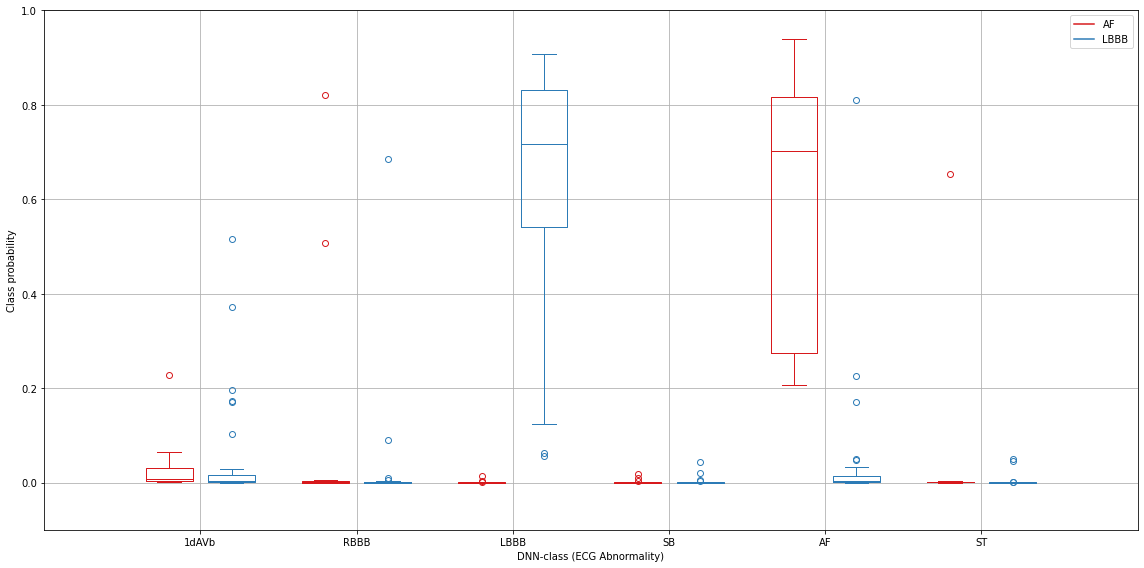

In [11]:
### musterloesung

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    plt.setp(bp['fliers'], markeredgecolor=color)
    
plt.figure(figsize = (16, 8))

ticks = abnorms
bpl = plt.boxplot(label.numpy()[af_pid], positions=np.array(range(len(ticks)))*2.0-0.4, widths=0.6)
bpr = plt.boxplot(label.numpy()[lbbb_pid], positions=np.array(range(len(ticks)))*2.0+0.4, widths=0.6)
set_box_color(bpl, '#D7191C')
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='AF')
plt.plot([], c='#2C7BB6', label='LBBB')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(-0.1, 1)
plt.xlabel("DNN-class (ECG Abnormality)")
plt.ylabel("Class probability")
plt.grid(True)
plt.tight_layout()

**A5:** pass

### musterloesung

**A5:** Sowohl für AF als auch LBBB werden öfter auch andere Abnormalitäten im gleichen EKG klassifiziert, besonders auffällig ist der AV-Block (1dAVb) bei LBBB. Außerdem ist sich das Modell im Testdatensatz bei LBBB häufig sicherer als bei AF, wenn man Median und Quantile betrachtet.

**Q6F:** Finden Sie ein mit SB oder ST klassifiziertes EKG (zu langsamer bzw. zu schneller Rhythmus) und überprüfen Sie die Klassifikation mit einer in Vorlesung 07 Merkmalsextraktion 1 gelernten Methode.